In [2]:
#import desired packages
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#import data 
data=pd.read_csv('iris.csv', names=['f1','f2','f3','f4','f5'])
data.drop([0],axis=0,inplace=True)

In [36]:
print(data.head())

    f1   f2   f3   f4      f5
1  5.1  3.5  1.4  0.2  setosa
2  4.9  3.0  1.4  0.2  setosa
3  4.7  3.2  1.3  0.2  setosa
4  4.6  3.1  1.5  0.2  setosa
5  5.0  3.6  1.4  0.2  setosa


In [37]:
data["f5"].value_counts()

setosa        50
virginica     50
versicolor    50
Name: f5, dtype: int64

/home/srikanth/anaconda3/envs/my_env/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


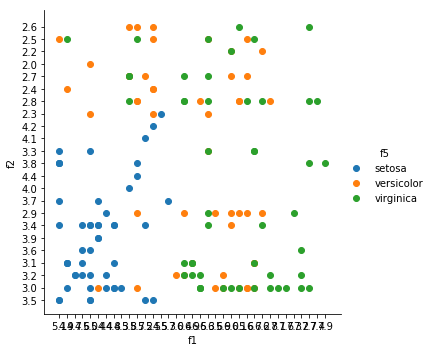

In [38]:
sns.FacetGrid(data, hue="f5", size=5) \
   .map(plt.scatter, "f1", "f2") \
   .add_legend()

In [39]:
#map data into arrays
s=np.asarray([1,0,0])
ve=np.asarray([0,1,0])
vi=np.asarray([0,0,1])
data['f5'] = data['f5'].map({'setosa': s, 'versicolor': ve,'virginica':vi})

In [40]:
print(data.head(10))

     f1   f2   f3   f4         f5
1   5.1  3.5  1.4  0.2  [1, 0, 0]
2   4.9  3.0  1.4  0.2  [1, 0, 0]
3   4.7  3.2  1.3  0.2  [1, 0, 0]
4   4.6  3.1  1.5  0.2  [1, 0, 0]
5   5.0  3.6  1.4  0.2  [1, 0, 0]
6   5.4  3.9  1.7  0.4  [1, 0, 0]
7   4.6  3.4  1.4  0.3  [1, 0, 0]
8   5.0  3.4  1.5  0.2  [1, 0, 0]
9   4.4  2.9  1.4  0.2  [1, 0, 0]
10  4.9  3.1  1.5  0.1  [1, 0, 0]


In [41]:
#shuffle the data
data=data.iloc[np.random.permutation(len(data))]


In [42]:
print(data.head(10))

      f1   f2   f3   f4         f5
25   4.8  3.4  1.9  0.2  [1, 0, 0]
132  7.9  3.8  6.4  2.0  [0, 0, 1]
118  7.7  3.8  6.7  2.2  [0, 0, 1]
17   5.4  3.9  1.3  0.4  [1, 0, 0]
51   7.0  3.2  4.7  1.4  [0, 1, 0]
68   5.8  2.7  4.1  1.0  [0, 1, 0]
131  7.4  2.8  6.1  1.9  [0, 0, 1]
69   6.2  2.2  4.5  1.5  [0, 1, 0]
114  5.7  2.5  5.0  2.0  [0, 0, 1]
14   4.3  3.0  1.1  0.1  [1, 0, 0]


In [43]:
data=data.reset_index(drop=True)


In [56]:
print(data.head(131))


      f1   f2   f3   f4         f5
0    4.8  3.4  1.9  0.2  [1, 0, 0]
1    7.9  3.8  6.4  2.0  [0, 0, 1]
2    7.7  3.8  6.7  2.2  [0, 0, 1]
3    5.4  3.9  1.3  0.4  [1, 0, 0]
4    7.0  3.2  4.7  1.4  [0, 1, 0]
5    5.8  2.7  4.1  1.0  [0, 1, 0]
6    7.4  2.8  6.1  1.9  [0, 0, 1]
7    6.2  2.2  4.5  1.5  [0, 1, 0]
8    5.7  2.5  5.0  2.0  [0, 0, 1]
9    4.3  3.0  1.1  0.1  [1, 0, 0]
10   5.4  3.9  1.7  0.4  [1, 0, 0]
11   5.0  3.5  1.3  0.3  [1, 0, 0]
12   5.1  3.5  1.4  0.2  [1, 0, 0]
13   5.5  3.5  1.3  0.2  [1, 0, 0]
14   6.0  3.4  4.5  1.6  [0, 1, 0]
15   5.0  3.6  1.4  0.2  [1, 0, 0]
16   6.7  3.1  4.7  1.5  [0, 1, 0]
17   6.9  3.1  5.1  2.3  [0, 0, 1]
18   6.2  2.9  4.3  1.3  [0, 1, 0]
19   5.8  2.7  3.9  1.2  [0, 1, 0]
20   7.7  2.6  6.9  2.3  [0, 0, 1]
21   6.5  3.0  5.5  1.8  [0, 0, 1]
22   6.0  2.2  4.0  1.0  [0, 1, 0]
23   4.9  3.1  1.5  0.1  [1, 0, 0]
24   5.2  3.4  1.4  0.2  [1, 0, 0]
25   4.9  3.1  1.5  0.1  [1, 0, 0]
26   5.0  2.0  3.5  1.0  [0, 1, 0]
27   7.2  3.2  6.0  

In [46]:
#training data
x_input=data.ix[0:105,['f1','f2','f3','f4']]
temp=data['f5']
y_input=temp[0:106]
#test data
x_test=data.ix[106:149,['f1','f2','f3','f4']]
y_test=temp[106:150]

/home/srikanth/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/srikanth/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [47]:
#placeholders and variables. input has 4 features and output has 3 classes
x=tf.placeholder(tf.float32,shape=[None,4])
y_=tf.placeholder(tf.float32,shape=[None, 3])
#weight and bias
W=tf.Variable(tf.zeros([4,3]))
b=tf.Variable(tf.zeros([3]))

In [48]:
# model 
#softmax function for multiclass classification
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [49]:
#loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [50]:
#optimiser -
train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
#calculating accuracy of our model 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [51]:
#session parameters
sess = tf.InteractiveSession()
#initialising variables
init = tf.initialize_all_variables()
sess.run(init)
#number of interations
epoch=2000

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [70]:
for step in range(epoch):
   _, c=sess.run([train_step,cross_entropy], feed_dict={x: x_input, y_:[t for t in y_input.as_matrix()]})
   if step%500==0:
       print(c)

/home/srikanth/anaconda3/envs/my_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


0.0378654
0.03622655
0.034883626
0.033760857


In [95]:
#random testing at Sn.130
a=data.loc[data.index[130],['f1','f2','f3','f4']]
print(a)

b=a.reset_index(1)
print(b)
largest = sess.run(tf.arg_max(y,1), feed_dict={x: b})[0]
if largest==0:
    print("flower is :Iris-setosa")
elif largest==1:
    print("flower is :Iris-versicolor")
else :
    print("flower is :Iris-virginica")


f1    6.9
f2    3.2
f3    5.7
f4    2.3
Name: 130, dtype: object


IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
print sess.run(accuracy,feed_dict={x: x_test, y_:[t for t in y_test.as_matrix()]})